In [ ]:

import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrtigerr","key":"ccce1302ad71b035f681e19a72789309"}'}

In [ ]:

import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 97% 557M/572M [00:05<00:00, 116MB/s]
100% 572M/572M [00:05<00:00, 103MB/s]


In [ ]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:

for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [ ]:

data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names


array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img


['person598_virus_1154.jpeg']
image shape (621, 1111, 3)


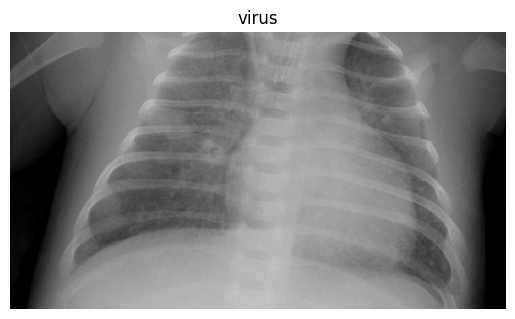

In [ ]:
img = view_image("/content/COVID_IEEE/","virus")

In [ ]:

data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [ ]:

virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [ ]:

data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 25s 316ms/step - loss: 0.8359 - accuracy: 0.6314 - val_loss: 0.4730 - val_accuracy: 0.7717
Epoch 2/15
32/32 [==============================] - 4s 136ms/step - loss: 0.4447 - accuracy: 0.8480 - val_loss: 0.4042 - val_accuracy: 0.8653
Epoch 3/15
32/32 [==============================] - 4s 136ms/step - loss: 0.2787 - accuracy: 0.9069 - val_loss: 0.2687 - val_accuracy: 0.9041
Epoch 4/15
32/32 [==============================] - 5s 144ms/step - loss: 0.2396 - accuracy: 0.9206 - val_loss: 0.1945 - val_accuracy: 0.9132
Epoch 5/15
32/32 [==============================] - 4s 138ms/step - loss: 0.1317 - accuracy: 0.9559 - val_loss: 0.1746 - val_accuracy: 0.9361
Epoch 6/15
32/32 [==============================] - 4s 140ms/step - loss: 0.1100 - accuracy: 0.9647 - val_loss: 0.1913 - val_accuracy: 0.9224
Epoch 7/15
32/32 [==============================] - 5s 149ms/step - loss: 0.0609 - accuracy: 0.9804 - val_loss: 0.2046 - val_accuracy: 0.9406
Epoch

Text(0.5, 1.0, 'Training and Validation Accuracy')

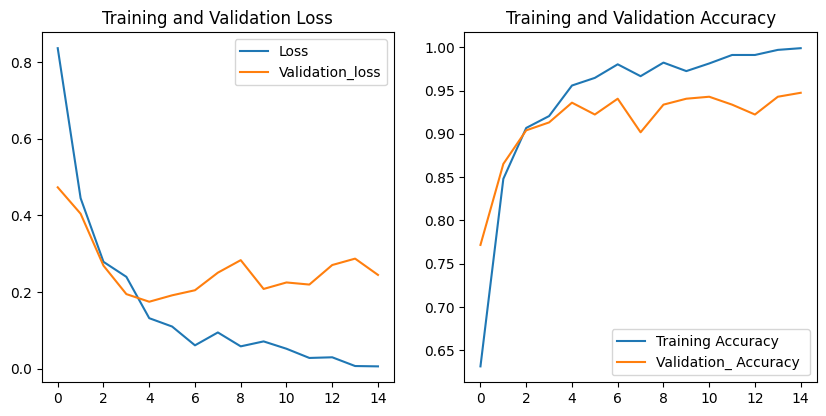

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training and Validation Accuracy")

In [ ]:

predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)
print(classification_report(y_test_new, y_pred))

12/12 [==============================] - 1s 97ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.92      0.94      0.93       129
           2       0.95      0.92      0.94       128

    accuracy                           0.94       365
   macro avg       0.94      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,105,3,0
normal,2,121,6
virus,2,8,118


In [ ]:

base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:

model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)


In [ ]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 8s 151ms/step - loss: 8.9676 - accuracy: 0.7647 - val_loss: 1.6711 - val_accuracy: 0.9110
Epoch 2/15
32/32 [==============================] - 2s 78ms/step - loss: 1.0550 - accuracy: 0.9382 - val_loss: 0.6801 - val_accuracy: 0.9589
Epoch 3/15
32/32 [==============================] - 2s 79ms/step - loss: 0.1863 - accuracy: 0.9794 - val_loss: 0.5442 - val_accuracy: 0.9566
Epoch 4/15
32/32 [==============================] - 3s 79ms/step - loss: 0.1089 - accuracy: 0.9843 - val_loss: 0.5554 - val_accuracy: 0.9612
Epoch 5/15
32/32 [==============================] - 3s 82ms/step - loss: 0.2481 - accuracy: 0.9755 - val_loss: 0.2978 - val_accuracy: 0.9680
Epoch 6/15
32/32 [==============================] - 2s 76ms/step - loss: 0.0350 - accuracy: 0.9961 - val_loss: 0.3670 - val_accuracy: 0.9658
Epoch 7/15
32/32 [==============================] - 2s 78ms/step - loss: 0.0636 - accuracy: 0.9951 - val_loss: 1.1949 - val_accuracy: 0.9132
Epoch 8/15
3

Text(0.5, 1.0, 'Training and Validation Accuracy')

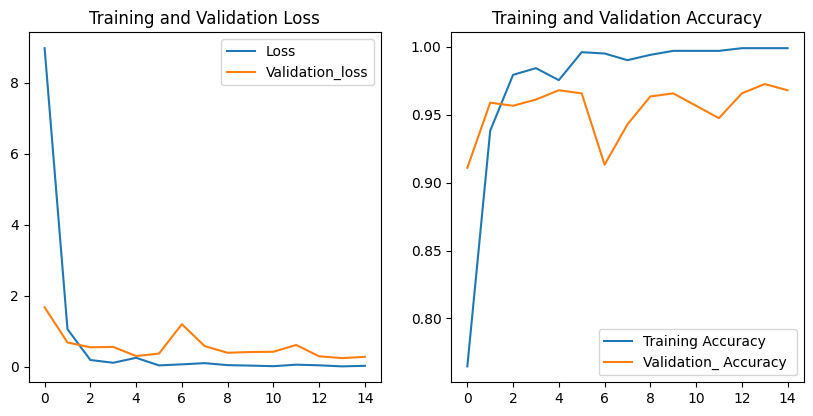

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training and Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)
print(classification_report(y_test_new, y_pred))

12/12 [==============================] - 1s 66ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.94      0.98      0.96       129
           2       0.98      0.95      0.96       128

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,0,127,2
virus,1,6,121
